# Avaliação Estatística de um banco de dados

Universidade Federal Rural de Pernambuco

Bacharelado em Ciência da Computação

Estatística Exploratória - Prof. Cláudio Cristino

Segunda Verificação de Aprendizagem - em 26/05/2022

Steffano Xavier Pereira

## Base de dados

Inicialmente vamos carregar o nosso banco de dados, para que possamos trabalhar em nosso ambiente virtual Python e fazer análises de acordo com o que foi proposto para a atividade.

In [37]:
import pandas as pd

# Importando os dados
dados = pd.read_csv('./data/Steffano Pereira - Dados_individuais_2VA_Est_Exploratoria - Steffano.csv', index_col='ID')

Podemos também visualizar um corte dos 5 primeiros dados, para confirmar que os dados estão organizados da maneira que desejamos:

In [38]:
dados.head()

,Tipo,Categoria,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
ID,,,,,,
App1,Pago,Entreterimento,94506,4,63,349
App2,Gratuito,Utilitário,281962,4,120,365
App3,Pago,Entreterimento,119282,3,70,335
App4,Gratuito,Entreterimento,136822,3,74,331
App5,Gratuito,Rede Social,286821,1,123,282


Como obtemos os valores em nossa variável `dados`, podemos continuar para as nossas atividades.

## Amostras

Para essa atividade também é necessário construir amostras que irão servir como referência para o estudo de nossa população. Para tal, o conjunto das amostras serão demonstrados nessa seção.

Vale observar que as amostras são do tipo de amostra aleatória simples.

### Amostras para o item 2 e 3

Vamos selecionar algumas amostras sob o tamanho dos aplicativos encima de nossa população.

In [39]:
amostra_tam10 = dados['Tamanho (Mb)'].sample(n=10).to_frame()
amostra_tam50 = dados['Tamanho (Mb)'].sample(n=50).to_frame()
amostra_tam100 = dados['Tamanho (Mb)'].sample(n=100).to_frame()

amostra_tam = [amostra_tam10, amostra_tam50, amostra_tam100]

### Amostra para o item 4

#### Amostra aleatória de tamanho 20

In [63]:
amostra_ale20 = dados.sample(n=20)

#### Amostras sobre a categoria científica

Vamos selecionar uma amostra de dados aleatória da categoria científica, para formular testes de hipóteses no item 4.

In [62]:
amostra_cie20 = dados[dados.Categoria == 'Científico']
amostra_cie20 = amostra_cie20.sample(n=20, replace=True)

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,20.000000,20.000000,20.00000,20.00000
mean,136900.300000,4.900000,75.75000,403.25000
std,87389.126905,0.307794,30.79965,11.38732
min,46147.000000,4.000000,45.00000,383.00000
25%,63104.000000,5.000000,52.00000,391.00000
50%,114918.500000,5.000000,68.50000,409.00000
75%,195326.000000,5.000000,89.00000,413.00000
max,305825.000000,5.000000,146.00000,416.00000


## 1. Análise Descritiva

Devemos fazer uma análise descritiva de todas as variáveis, para isso, vamos estabelecer os seguintes critérios:

- Devemos analisar as variáveis qualitativas separadamente
- É interessante observar análises de aplicativos de categorias diferentes

### 1.1 Análise Geral

Inicialmente, podemos analisar dados descritivos de **toda nossa amostra** com a função `describe()`.

Considere nesse quesito que:

- count - Número de exemplos
- mean - Média
- std - Desvio Padrão
- min - Valor mínimo
- 25% - Primeiro quartil
- 50% - Segundo Quartil/Mediana
- 75% - Terceiro Quartil 
- max - Valor Máximo

In [40]:
dados.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,316.000000,316.000000,316.000000,316.000000
mean,167952.481013,3.598101,82.810127,353.224684
std,87128.578413,1.017246,30.090267,36.187916
min,12954.000000,1.000000,10.000000,258.000000
25%,94472.250000,3.000000,63.000000,329.000000
50%,175262.000000,4.000000,84.000000,354.000000
75%,242500.750000,4.000000,103.000000,376.250000
max,309906.000000,5.000000,183.000000,467.000000


Para os atributos quantitativos, podemos tirar algumas conclusões:

- Download

    Podemos observar o número de Downloads como um intervalo entre `12.954` à `309.906`, do qual podemos concluir que nossa amostra possui aplicativos na ordem das dezena de milhares até 3 centena de milhares, do qual pode se considerar que temos aplicativos com um nível de fama alto, logo quanto maior o número de downloads, maior é o público-alvo atingido por esse aplicativo.
    
- Avaliação

    Na avaliação, podemos observar um fato interessante, que é a média e seu desvio padrão; em geral, a avaliação parece balanceada, pois provavelmente, devemos ter aplicativos com boas avaliações e também aplicativos más avaliações, com o primeiro quartil (25%) até avaliação `3` e do segundo (50%) e terceiro quartil (75%) avaliações maiores que `4`, daqui já podemos concluir que há um grupo marginal/pequeno de avaliações `1` e `2`; e um grupo considerável de avaliações entre `4` e `5`. Vale observar que nessa amostra não há avaliações com valor `0`.

- Tamanho

    No tamanho, é interessante observar que temos um intervalo bem definido entre `10` mb até `183` mb. No geral, os aplicativos da amostra possuem uma média de `82,81` mb e desvio padrão de `30,09` mb. De modo geral, estão bem distribuídos de acordo com seus quartis, principalmente que há uma minoria menor que `63` mb. O tamanho será importante de observar, quando estudarmos as categorias em específico.
    
- Tempo no ar

    Já para o tempo no ar, um ponto muito importante de se observar, é que o mínimo de dias equivale há `258` dias, o que corresponde a um período maduro de dias maior que 6 meses de lançamento, o que torna a amostra madura o suficiente para o estudo.

Podemos separar nossa amostra por tipo e categoria e assim analisar cada uma individualmente.

### 1.2 Análise Descritiva por Tipo

Para analisar os aplicativos pagos de aplicativos gratuitos é necessário separar os dados de acordo, e em seguida observar suas relações descritivas.

In [41]:
apps_pagos = dados[dados.Tipo == 'Pago']
apps_gratuitos = dados[dados.Tipo == 'Gratuito']

#### Aplicativos Pagos

In [42]:
apps_pagos.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,116.000000,116.000000,116.000000,116.000000
mean,70553.181034,3.491379,51.637931,349.077586
std,34263.839918,0.991228,15.717283,35.145450
min,12954.000000,1.000000,10.000000,258.000000
25%,40461.750000,3.000000,41.750000,326.500000
50%,75427.000000,4.000000,56.500000,350.500000
75%,98713.000000,4.000000,64.000000,368.250000
max,128532.000000,5.000000,72.000000,446.000000


#### Aplicativos Gratuitos

In [43]:
apps_gratuitos.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,200.000000,200.000000,200.000000,200.000000
mean,224444.075000,3.660000,100.890000,355.630000
std,50998.471599,1.029417,19.887318,36.650778
min,130861.000000,1.000000,73.000000,265.000000
25%,180537.250000,3.000000,85.000000,330.000000
50%,224285.500000,4.000000,97.000000,356.000000
75%,269094.250000,4.000000,113.000000,383.250000
max,309906.000000,5.000000,183.000000,467.000000


### 1.2 Análise Descritiva por Categoria

In [44]:
apps_utilitario = dados[dados.Categoria == 'Utilitário']
apps_entretenimento = dados[dados.Categoria == 'Entreterimento']
apps_redesSocial = dados[dados.Categoria == 'Rede Social']
apps_cientifico = dados[dados.Categoria == 'Científico']


In [45]:
apps_utilitario.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,94.00000,94.000000,94.000000,94.000000
mean,193106.12766,4.351064,90.297872,378.989362
std,83619.51466,0.479862,31.111603,12.589033
min,12954.00000,4.000000,10.000000,360.000000
25%,146756.50000,4.000000,76.250000,368.000000
50%,206488.50000,4.000000,92.000000,375.500000
75%,256595.50000,5.000000,108.000000,389.750000
max,308516.00000,5.000000,157.000000,405.000000


In [46]:
apps_entretenimento.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,138.000000,138.000000,138.000000,138.000000
mean,153102.144928,3.282609,78.398551,340.362319
std,89825.282518,0.566577,30.941324,14.265953
min,14886.000000,2.000000,16.000000,303.000000
25%,79786.750000,3.000000,58.250000,331.000000
50%,129696.500000,3.000000,72.500000,343.000000
75%,234236.000000,4.000000,99.750000,350.750000
max,309906.000000,4.000000,183.000000,364.000000


In [47]:
apps_redesSocial.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,49.000000,49.000000,49.000000,49.000000
mean,183315.510204,2.122449,87.122449,299.469388
std,69331.964371,0.725507,21.148909,18.210691
min,27824.000000,1.000000,33.000000,258.000000
25%,137477.000000,2.000000,74.000000,289.000000
50%,193074.000000,2.000000,89.000000,302.000000
75%,239272.000000,3.000000,102.000000,316.000000
max,293256.000000,3.000000,128.000000,322.000000


In [48]:
apps_cientifico.describe()

,Download (número),Avaliação (0 - 5),Tamanho (Mb),Tempo no ar (em dias)
count,35.000000,35.000000,35.000000,35.000000
mean,137441.485714,4.885714,74.057143,410.000000
std,89249.778169,0.322803,30.202204,20.531181
min,26949.000000,4.000000,32.000000,380.000000
25%,55620.000000,5.000000,49.000000,393.500000
50%,114270.000000,5.000000,68.000000,410.000000
75%,209662.000000,5.000000,92.500000,414.500000
max,305825.000000,5.000000,146.000000,467.000000


Observando as categorias, podemos observar que há uma categoria dominante, que é a de entretenimento, com `138` aplicativos. Observando o **número de Downloads**, temos a média dos mais baixados são os **aplicativos utilitários** e também com maior **tamanho**. Os **aplicativos científicos** compõem um grupo que possuem **melhor avaliação** e também com maior **tempo no ar**, porém vale notar que, os **aplicativos científicos** são minoria na amostra por categoria e representam apenas `35` dos `316`, esse valor por sua vez pode representar apenas uma parcela pequena se comparada com toda a população de aplicativos científicos; logo, vale ter cuidado ao tirar conclusões e outros estudos são necessários para uma maior certeza.

## 2. Estimação Pontual

Para a Estimação Pontual, vamos utilizar o conjunto de amostras de `Tamanho (Mb)`, veja que essa amostragem é simples e aleatória, e com a estimação Pontual buscamos observar os valores da amostra para estimar os valores da nossa população. Iremos trabalhar com 3 amostras (10, 50 e 100 exemplos de um total de 316 exemplos da população) que irão tentar estimar o valor da população.

### 2.1 Seleção dos estimadores

Vamos utilizar 2 estimadores para esse conjunto de dados, a **média amostral** e também a **variância amostral**. Pois a média amostral considera todos os valores de nossa amostra e a variância garante a exatidão do nosso conjunto de dados em torno de nossa média.

### 2.2 Criando nossos estimadores amostrais

Para isso vamos utilizar duas ferramentas da biblioteca `pandas`: `mean()` que consiste na função que obtém a média de um conjunto de dados e `var()` que consiste na função que obtém a variância não viciada de um conjunto de dados.

In [49]:
# Função para calcular a estimativa de uma amostra
def calcular_estimacao_amostral(amostra: pd.DataFrame):
    media_amostral = float(amostra.mean())
    variancia_amostral = float(amostra.var())

    return media_amostral, variancia_amostral

### 2.3 Calculando as Estimativas

Vamos estimar por meio do cálculo amostral de média e variância e iremos comparar o resultado com os parâmetros.

In [50]:
estimativa = []
for amostra in amostra_tam:
    estimativa.append(calcular_estimacao_amostral(amostra))

Vamos comparar as estimativas do `Tamanho (Mb)` com o valor do parâmetro.

In [51]:
dados_tam = dados['Tamanho (Mb)']

print("Estudo sobre a população de aplicativos e seus respectivos tamanhos e")
print("amostras diversas que aproximam suas estimativas com os parâmetros.\n")
print(f"Parâmetro: ({dados_tam.mean()}, {dados_tam.var()})")
print(f"Amostra 1: {estimativa[0]}")
print(f"Amostra 2: {estimativa[1]}")
print(f"Amostra 3: {estimativa[2]}")


Estudo sobre a população de aplicativos e seus respectivos tamanhos e
amostras diversas que aproximam suas estimativas com os parâmetros.

Parâmetro: (82.81012658227849, 905.4241510950372)
Amostra 1: (75.6, 674.7111111111112)
Amostra 2: (90.84, 976.8310204081633)
Amostra 3: (80.05, 880.8156565656566)


Como visto na seção de amostras, separamos em 3 amostras aleatórias simples:

- Amostra 1: 10 exemplos
- Amostra 2: 50 exemplos
- Amostra 3: 100 exemplos

Observe que a amostra 1 se distancia bastante do parâmetro, todavia quando vemos a amostra 2 e 3, podemos observar que essas duas se aproximam ainda mais do nosso parâmetro. Dessa forma vale observar que quanto maior o número de exemplos a estimativa é mais precisa do nosso parâmetro.

## 3. Análise Intervalar

Ainda trabalhando sobre o conjunto de amostras de `Tamanho (Mb)`, porém dessa vez iremos trabalhar com a amostra de 100 exemplos, nós agora iremos observar uma análise intervalar dessa amostra, com uma confiança de **90%** e também sabemos a variância dessa população.

### 3.1 Selecionar informações cruciais para o Intervalo de confiança

O intervalo de confiança, consiste no intervalo de valores que podemos construir sob um coeficiente de confiança, visto que os dados de nossa população obedecem a uma distribuição normal, onde `T ~ N(μ,30)`. Para tal, foi estabelecido um intervalo de confiança de 95%, do qual irá demonstrar um intervalo que a média amostral irá variar para mais ou para menos. Nesse caso, precisamos saber a `P(Z < z)`, para um intervalo de confiança de 95%, como são 2 caudas, teremos que consultar o valor de `z`.



Consultando a tabela da normal, temos que `z (95%) = 1,96`

In [52]:
ZIC = 1.96

### 3.2 Calculando o Intervalo de confiança

Para calcular o Intervalo de confiança, basta aplicar a fórmula de normalização e estabelecer o intervalo da média.

In [53]:
import math

def intervalo_confianca(media, variancia, tam_amostra, z):
    intervalo_menor = media - z*(math.sqrt(variancia/tam_amostra))
    intervalo_maior = media + z*(math.sqrt(variancia/tam_amostra))

    return intervalo_menor, intervalo_maior


Fazendo isso, podemos calcular o intervalo de confiança para a nossa amostra de `Tamanho (Mb)` com 100 exemplos.

In [54]:
intervalo_confianca_amostra_tam100 = intervalo_confianca(
      dados['Tamanho (Mb)'].mean(),
      amostra_tam100.var(),
      amostra_tam100.count(),
      ZIC
)

print(intervalo_confianca_amostra_tam100)

(76.99313300632997, 88.627120158227)


Com isso obtemos que o nosso intervalo de confiança é de [`76,99`,`88.63`], note que estabelecemos um intervalo de confiança alto para essa amostra, visto que essa amostra representa cerca de 1/3 de nossa população, logo é uma amostra que representa um alto nível de confiança. Vale lembrar que, em um caso real, amostras que representam uma população na área de tecnologia, costuma apresentar um erro pequeno se comparado à outras áreas de pesquisa.

## 4. Teste de Hipótese para a média

### 4.1 Formulação do problema da hipótese

Imagine que desejamos saber se uma determinada amostra de aplicativos corresponde ao grupo _premium_ de apps do repositório de aplicativos, tal amostra deve possuir uma avaliação maior que `4` avaliações. Logo, dada uma amostra de 20 aplicativos, determine se o grupo de apps faz parte de um grupo _premium_ de apps ou não. Estabeleça que para as amostras nível de significância é de `α = 3%`.



### 4.2 Estabelecendo Hipóteses

Para a hipótese nula (`H0`), devemos mostrar que os aplicativos se mantém em um cenário normal e não pertence ao grupo de aplicativos premium da loja, já para a hipótese alternativa (`H1`), é que o grupo de aplicativos pertencem a um grupo premium de aplicativos. Logo, temos as seguintes hipóteses:

`H0: μ < 4` (o grupo de apps não faz parte da seleção _premium_)

`H1: μ ≥ 4` (o grupo de apps pertence a seleção _premium_)

Portando, trata-se de um teste unilateral.

### 4.3 Fixar μ e obter a região crítica

Vamos usar duas amostras para esse teste de hipótese, uma amostra aleatória dos dados e outra amostra que representa os aplicativos de categoria científica. Para ambos a média amostral se segue:

In [68]:
media_amostral_aleatorio_20 = amostra_ale20['Avaliação (0 - 5)'].mean()
media_amostral_catCientifica_20 = amostra_cie20['Avaliação (0 - 5)'].mean()

print(f"Média amostral amostra aleatória: {media_amostral_aleatorio_20}")
print(f"Média amostral amostra cat. científica: {media_amostral_catCientifica_20}")


Média amostral amostra aleatória: 3.35
Média amostral amostra cat. científica: 4.9


Como o teste é unilateral, podemos estabelecer que a área da curva a direita, com `α = 3%` será `P(Z < Zc) = 0,03`, logo `Zc (tab. Normal de 0.03 da cauda direita) ≃ 1.88` 

In [70]:
ZIC_HIPOTESE = 1.88

O desvio-padrão da população é conhecido, logo, podemos usar a seguinte fórmula da área crítica:

In [102]:
import math

def valor_critico(media, variancia, tam_populacao, z):
    return media - z*(math.sqrt(variancia/tam_populacao))


### 4.4 Concluir o teste com base na estimativa e na região crítica

Aplicamos as fórmulas para nossas duas amostras e em seguida devemos testar se o valor de `Xc` para cada normal.

In [104]:
variancia_avaliacao = dados['Avaliação (0 - 5)'].var()
Xc_aleatorio = valor_critico(
    media_amostral_aleatorio_20, variancia_avaliacao, 20, ZIC_HIPOTESE)
Xc_cientifico = valor_critico(
    media_amostral_catCientifica_20, variancia_avaliacao, 20, ZIC_HIPOTESE)


Agora, vamos verificar se nossas amostras pertencem ou não ao grupo _premium_.

Para o grupo de amostras aleatórias, constatamos que:

In [105]:
True if 4 < Xc_aleatorio else False


False

Logo, a hipótese para o grupo aleatório é nula, e esse grupo não pertence ao grupo _premium_

Porém, para a o grupo de amostras de **categoria científica**:

In [106]:
True if 4 < Xc_cientifico else False


True

## 5. Teste de Hipótese de Independência

Bom e se quisermos observar a independência entre as categorias? mais especificamente, será que conseguimos dizer que as médias são diferentes entre si? Como saber se as categorias apresentam médias de downloads independentes entre si? Podemos criar a seguinte hipótese para verificar isso:

`H0: μc = μe = μr = μu` (as médias populacionais são iguais)

`H1: μc ≠ μe ≠ μr ≠ μu` (as médias populacionais são diferentes, ou pelo menos uma das médias é diferente)

Visto que temos 1 atributo categórico (Categoria) e 1 atributo contínuo (Downloads), podemos utilizar o método de ANálise de VARiância (ANOVA) para obter informações que provam que nossa hipótese nula é falsa.

Para isso, vamos utilizar uma implementação em Python que calcula `F` e `p-valor` do nosso conjunto de dados para que possamos tirar conclusões.

Nossa amostra, irá se tratar dos exemplos obtidos no item 2, logo:

In [141]:
# Separando minha amostra

download_cientifico = apps_cientifico['Download (número)'].values
download_utilitario = apps_utilitario['Download (número)'].values
download_redesSocial = apps_redesSocial['Download (número)'].values
download_entretenimento = apps_entretenimento['Download (número)'].values

In [142]:
from scipy.stats import f_oneway

# Teste ANOVA one_way
F, p_valor = f_oneway(download_cientifico, download_utilitario, 
                      download_redesSocial, download_entretenimento)

In [146]:
print('F-Statistic = %f, p-valor = %f' % (F, p_valor))

F-Statistic=6.176475, p=0.000434


Como `F` é relativamente alto e `p-valor` é menor que o limiar de `0.05`, podemos rejeitar a Hipótese Nula (`H0`) e aceitar a Hipótese alternativa que há médias independentes.

## 6. Estudo de Regressão

Para analisar se é possível observar alguma regressão em nossos dados, é necessário identificar onde ocorre regressão linear entre os nossos dados.

### 6.1 Testando se há linearidade entre meus dados

Vamos testar os valores, e se encontrarmos alguma correlação linear, poderemos observar um fator linear.

In [107]:
import matplotlib.pyplot as plt

dados_download = dados['Download (número)'].values
dados_tamanho = dados['Tamanho (Mb)'].values
dados_tempo = dados['Tempo no ar (em dias)'].values

Observe que, não consideramos os dados discretos, pois variáveis discretas possuem um nível limitado de valores!

#### Relação entre Tamanho e Tempo no ar

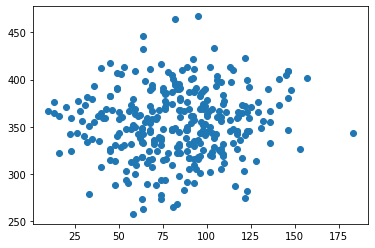

In [112]:
plt.plot(dados_tamanho, dados_tempo, 'o')

Vemos que, não há uma relação linear explícita entre os dados.

#### Relação entre Download e Tempo no ar

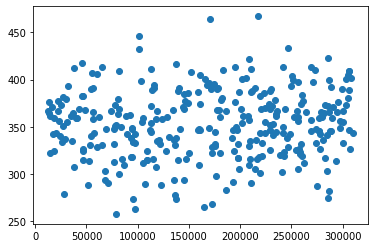

In [117]:
plt.plot(dados_download, dados_tempo, 'o')

Novamente, não encontramos uma relação linear entre os dados.

#### Relação entre Tamanho e Download

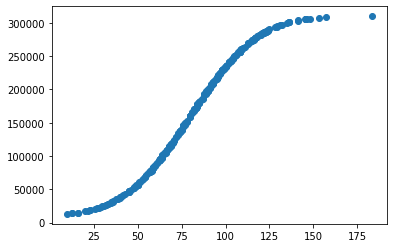

In [116]:
plt.plot(dados_tamanho, dados_download, 'o')

Opa! Parece que encontramos algum padrão entre os dados de Tamanho (Mb) e número de Downloads

### 6.2 Aprofundando sobre uma Regressão Linear

Bom, sabemos que Tamanho e Download apresentam uma certa relação, parecida com uma relação linear, será que podemos estabelecer um modelo linear sobre esse padrão?

Uma das vantagens de se trabalhar em **Python** é a sua capacidade de efetuar tarefas custosas para a análise de dados, vemos que, para estabelecer um modelo de regressão linear é necessário descobrir o `β0` e também o `β1`, a partir de um problema de minimização e aproximando uma reta em correspondência com os "erros" presentes em nossos dados.

Fato é que, vamos utilizar de uma ferramenta que cria um modelo de regressão, e que treina o mesmo com um vetor de coeficientes que minimiza de acordo com a soma dos quadrados entre os dados e a reta, até que a reta se aproxime do melhor coeficiente possível.

In [126]:
from sklearn.linear_model import LinearRegression

# Normalizando os dados
dados_normalizados_tamanho = dados_tamanho.reshape(-1,1)
dados_normalizados_download = dados_download.reshape(-1,1)

# Treinamento do algoritmo de Regressão Linear
model = LinearRegression()
model.fit(dados_normalizados_tamanho, dados_normalizados_download)

LinearRegression()

A partir disso, podemos obter algumas informações sobre o nosso modelo de regressão, como seus coeficientes (`β0` e `β1`) e o erro (`ε`):

In [136]:
print("O modelo estabelece que Downloads = {:.5} + {:.5}X + ε".format(
    model.intercept_[0], model.coef_[0][0]))


O modelo estabelece que Downloads = -6.6605e+04 + 2832.5X + ε


Também podemos montar um gráfico da reta, por meio da previsão do modelo correspondente, vejamos:

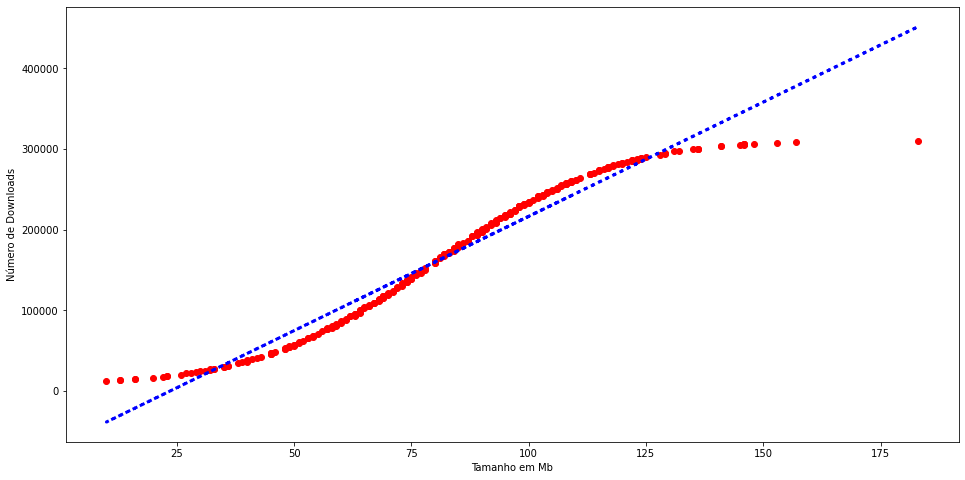

In [135]:
previsao_modelo = model.predict(dados_normalizados_tamanho)

plt.figure(figsize = (16,8))
plt.scatter(dados_tamanho, dados_download, c='red')

plt.plot(
    dados_tamanho,
    previsao_modelo,
    c='blue',
    linewidth=3,
    linestyle=':')

plt.xlabel("Tamanho em Mb")
plt.ylabel("Número de Downloads")
plt.show()

Logo, podemos concluir que, sim é possível estabelecer um coeficiente de regressão linear, e que se assemelha os pontos na reta, porém apenas inicialmente, após um limiar de cerca de 300.000 Downloads a regressão linear perde sua forma.